In [17]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("international-airline-passengers.csv",usecols=[1])

In [6]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
values = df.values.astype('float32')

In [8]:
values.shape

(144, 1)

In [15]:
train_size = int((values.shape[0]*0.67))
test_size = values.shape[0] - train_size
train = values[0:train_size]
test = values[train_size:]

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [20]:
def create_dataset(data,k):
    dataX,dataY = [],[]
    for i in range(data.shape[0]-k):
        x = data[i:i+k]
        y = data[i+k,0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX),np.array(dataY)

In [27]:
#Notice that in the dataset below there are values above 1 as well but we had already scaled it to range 0 to 1
#This is because this is the test data and values can be out of range here
look_back = 12
testX,testY = create_dataset(test,look_back)
trainX,trainY = create_dataset(train,look_back)

In [28]:
#Reshaping the data for the RNN model
#The shape should be 3D - no. of inputs, lookback, no. of features
trainX = np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))
trainX.shape

(84, 12, 1)

In [29]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [31]:
model = Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')
model.fit(trainX,trainY,epochs=10,batch_size=1)

Epoch 1/10
84/84 [==============================] - 1s 2ms/step - loss: 0.2986
Epoch 2/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0453
Epoch 3/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 4/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 5/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 6/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 7/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 8/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 9/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 10/10
84/84 [==============================] - 0s 1ms/step - loss: 0.0079


In [42]:
#ravel is used to convert to 1D
test_predict = model.predict(testX)
test_predict = scaler.inverse_transform(test_predict).ravel()

train_predict = model.predict(trainX)
train_predict = scaler.inverse_transform(train_predict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

test_predict.shape,testTrue.shape

((36,), (36,))

In [43]:
from matplotlib import pyplot as plt

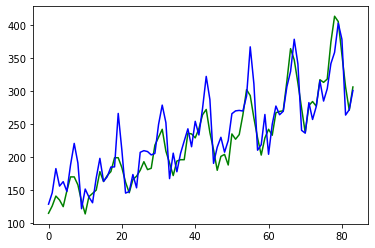

In [44]:
plt.plot(trainTrue,c='g')
plt.plot(train_predict,c='b')
plt.show()

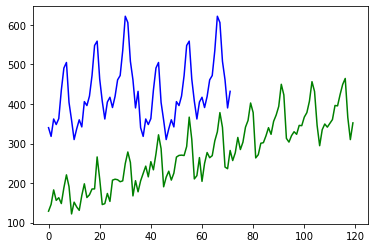

In [45]:
combined_pred = np.concatenate((train_predict,test_predict))
combined_true = np.concatenate((testTrue,testTrue))
plt.plot(combined_pred,c='g')
plt.plot(combined_true,c='b')
plt.show()